In [1]:
# Importing packages and initializing the variable
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erf
import matplotlib.mlab as mlab
import scipy.integrate as integrate
import matplotlib.patches as mpatches
import pylab as P

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Data = [ 4.66, 0.85, 2.71, 0.05, 3.00, 0.84, 0.005, 0.006, 0.60, 1.28 ]
Data = np.array(Data)/100
alpha = 0.05


# P values 

In [2]:
print('P Values - ',4.66, 0.85, 2.71, 0.05, 3.00, 0.84, 0.005, 0.006, 0.60, 1.28)

('P Values - ', 4.66, 0.85, 2.71, 0.05, 3.0, 0.84, 0.005, 0.006, 0.6, 1.28)


# Single tests - Significance - 0.05

In [3]:
for i in range(10):
    if Data[i] < alpha:
        p = "%.4f" % Data[i]
        print('Reject hypothesis',i,'with p value', p)

('Reject hypothesis', 0, 'with p value', '0.0466')
('Reject hypothesis', 1, 'with p value', '0.0085')
('Reject hypothesis', 2, 'with p value', '0.0271')
('Reject hypothesis', 3, 'with p value', '0.0005')
('Reject hypothesis', 4, 'with p value', '0.0300')
('Reject hypothesis', 5, 'with p value', '0.0084')
('Reject hypothesis', 6, 'with p value', '0.0001')
('Reject hypothesis', 7, 'with p value', '0.0001')
('Reject hypothesis', 8, 'with p value', '0.0060')
('Reject hypothesis', 9, 'with p value', '0.0128')


# Benforoni

In [4]:
for i in range(10):
    if Data[i] < alpha/10:
        p = "%.4f" % Data[i]
        print('Reject hypothesis',i,'with p value', p)

('Reject hypothesis', 3, 'with p value', '0.0005')
('Reject hypothesis', 6, 'with p value', '0.0001')
('Reject hypothesis', 7, 'with p value', '0.0001')


# Holm's Procedure

In [5]:
for i in range(10):
    if sorted(Data)[i] < alpha/(10-i):
        index = np.where(Data == sorted(Data)[i])[0][0]
        p = "%.4f" % Data[index]
        print('Reject hypothesis',index,'with p value', p)
    else:
        break

('Reject hypothesis', 6, 'with p value', '0.0001')
('Reject hypothesis', 7, 'with p value', '0.0001')
('Reject hypothesis', 3, 'with p value', '0.0005')
('Reject hypothesis', 8, 'with p value', '0.0060')


# BH procedure

In [6]:
Sn = 2.92896825397 #(The 1+1/2..1/n factor)
for i in range(10):
    if sorted(Data)[i] < ((i+1)*alpha)/(Sn*10):
        index = np.where(Data == sorted(Data)[i])[0][0]
        p = "%.4f" % Data[index]
        print('Reject hypothesis',index,'with p value', p,((i+1)*alpha)/(10))

('Reject hypothesis', 6, 'with p value', '0.0001', 0.005)
('Reject hypothesis', 7, 'with p value', '0.0001', 0.01)
('Reject hypothesis', 3, 'with p value', '0.0005', 0.015000000000000003)
('Reject hypothesis', 8, 'with p value', '0.0060', 0.02)
('Reject hypothesis', 5, 'with p value', '0.0084', 0.025)
('Reject hypothesis', 1, 'with p value', '0.0085', 0.030000000000000006)


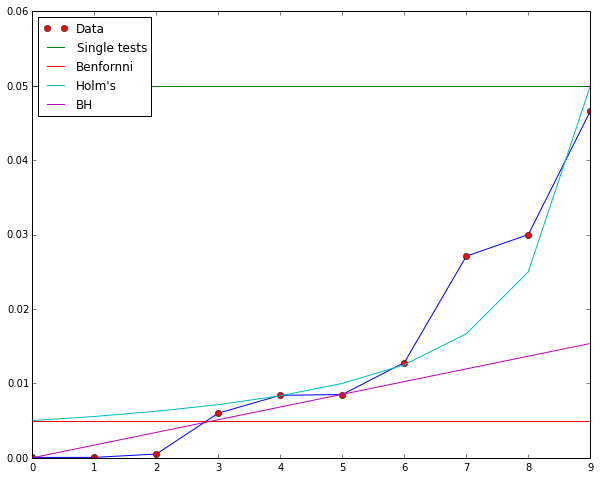

In [7]:

Holmes = [ alpha/(10-k) for k in range(10)]
BH = [ k*alpha/(10*2.92896825397) for k in range(10)]
P.plot(sorted(Data))
P.plot(sorted(Data), 'ro',  label="Data")
P.plot([alpha]*10, label="Single tests")
P.plot([alpha/10]*10, label="Benfornni")
P.plot(Holmes, label="Holm's")
P.plot(BH, label="BH")
P.legend(loc='upper left')
P.show()